In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

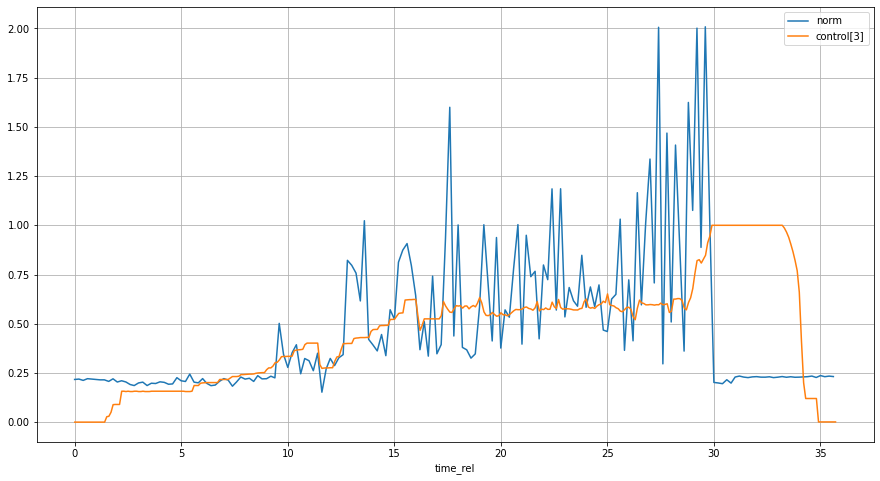

In [21]:
actuator_controls_0_0 = pd.read_csv(r"../logs/actuator_controls_0_0/log_31_2021-7-9-16-35-26.csv")
vehicle_magnetometer_0 = pd.read_csv(r"../logs/vehicle_magnetometer_0/log_31_2021-7-9-16-35-26.csv")

actuator_armed_0 = pd.read_csv(r"../logs/vehicle_magnetometer_0/log_31_2021-7-9-16-35-26.csv")
t0 = actuator_armed_0['timestamp'][0]

vehicle_magnetometer_0['time_rel'] = (vehicle_magnetometer_0['timestamp'] - t0)/1e6
actuator_controls_0_0['time_rel'] = (actuator_controls_0_0['timestamp'] - t0)/1e6

fig = plt.figure(figsize=(15,8))
ax = fig.gca()

vehicle_magnetometer_0['norm'] = np.sqrt(vehicle_magnetometer_0['magnetometer_ga[0]']**2 +
                                vehicle_magnetometer_0['magnetometer_ga[1]']**2 +
                                vehicle_magnetometer_0['magnetometer_ga[2]']**2)
vehicle_magnetometer_0.plot(y='norm', x='time_rel', ax=ax)
actuator_controls_0_0.plot(y='control[3]',x='time_rel',ax=ax)
plt.grid()

In [154]:
def linear(x, a, b):
    return a*x + b

def quadratic(x, a, b, c):
    return a*x**2 + b*x + c

def quadraticErrorLinear(p):
    y = linear(t, p[0], p[1])
    erro = (R - y)**2
    return np.sum(erro) / np.size(erro)

def quadraticErrorQuadratic(p):
    y = quadratic(t, p[0], p[1], p[2])
    erro = (R - y)**2
    return np.sum(erro) / np.size(erro)

Optimization terminated successfully.
         Current function value: 0.030536
         Iterations: 220
         Function evaluations: 399
-0.0008414737804735765t^2 + 0.049179455598895375t -0.0008414737804735765


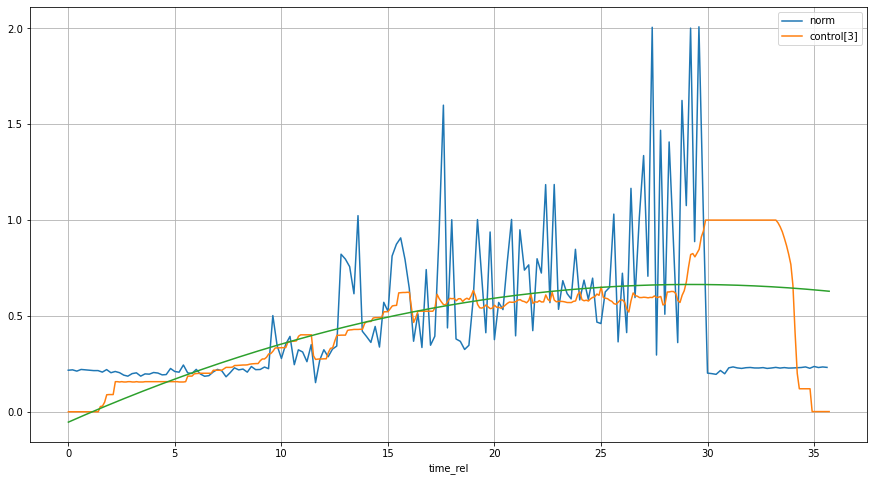

In [155]:
# scipy.optimize.fmin(func, x0, args=(), xtol=0.0001, ftol=0.0001, maxiter=None, maxfun=None, full_output=0, disp=1, retall=0, callback=None, initial_simplex=None)
t = actuator_controls_0_0['time_rel']
R = actuator_controls_0_0['control[3]']

params = scipy.optimize.fmin(quadraticErrorQuadratic, [1, 1, 1])

print(str(params[0]) + "t^2 + " + str(params[1]) + "t " + str(params[0]))

plotY = quadratic(t, params[0], params[1], params[2])


fig = plt.figure(figsize=(15,8))
ax = fig.gca()

vehicle_magnetometer_0.plot(y='norm', x='time_rel', ax=ax)
actuator_controls_0_0.plot(y='control[3]',x='time_rel',ax=ax)
ax.plot(t, plotY)
plt.grid()
